In [1]:
import orekit
import numpy as np

vm = orekit.initVM()
print ('Java version:',vm.java_version)
print ('Orekit version:', orekit.VERSION)

from orekit.pyhelpers import setup_orekit_curdir, download_orekit_data_curdir
setup_orekit_curdir()

from org.orekit.utils import Constants

from scenarios.utils.utility import get_vel, get_vels, r2d


Java version: 1.8.0_382
Orekit version: 12.0.1
File or folder: /home/chris/git/space/src/orekit-data.zip  not found


        The Orekit library relies on some external data for physical models. 
        Typical data are the Earth Orientation Parameters and the leap seconds history, 
        both being provided by the IERS or the planetary ephemerides provided by JPL. 
        Such data is stored in text or binary files with specific formats that Orekit knows 
        how to read, and needs to be provided for the library to work.

        You can download a starting file with this data from the orekit gitlab at:
        https://gitlab.orekit.org/orekit/orekit-data

        or by the function:
        orekit.pyhelpers.download_orekit_data_curdir()

        


In [2]:

###

RE = Constants.WGS84_EARTH_EQUATORIAL_RADIUS
MU = Constants.WGS84_EARTH_MU

print(f'using Constants.WGS84_EARTH_EQUATORIAL_RADIUS {Constants.WGS84_EARTH_EQUATORIAL_RADIUS} as RE')
print(f'using Constants.WGS84_EARTH_MU {Constants.WGS84_EARTH_MU} as MU')

g_test = MU / RE**2

print(f'g (m/s^2) = {g_test}')


## TODO: Reconsider MUs ?

MU_JPL = Constants.JPL_SSD_EARTH_GM

print(f'mu = {MU}')
print(f'mu_jpl = {MU_JPL}')
print(f'mu - mujpl = {MU - MU_JPL}')

RM = Constants.MOON_EQUATORIAL_RADIUS


using Constants.WGS84_EARTH_EQUATORIAL_RADIUS 6378137.0 as RE
using Constants.WGS84_EARTH_MU 398600441800000.0 as MU
g (m/s^2) = 9.7982854791873
mu = 398600441800000.0
mu_jpl = 398600436738211.56
mu - mujpl = 5061788.4375


In [3]:
###

h_leo = 185e3 # m
h_geo = 36000e3 # m

v_geo = get_vel( h_geo+RE, h_geo+RE )

print(f'v_geo (km/s) = {v_geo/1000}')


(vp_gto,va_gto) = get_vels( h_leo+RE, h_geo+RE )

print(f'vp_gto (km/s) = {vp_gto/1000}, va_gto (km/s) = {va_gto/1000}')

dv_gto2geo = v_geo - va_gto
print(f'DV GTO 2 GEO = v_geo - va_gto (m/s) = {dv_gto2geo}')




TypeError: get_vel() missing 1 required positional argument: 'MU'

In [ ]:
dv_earth_to_gto = 9.4 + 2.44
dv_gto_to_geo_check = 1.7

print(f'DV EARTH 2 GTO = = = {dv_earth_to_gto}')


DV EARTH 2 GTO = = = 11.84


In [ ]:

### Rocket Equation
def rocket_equation( dv, m0, Isp, g0 ):
    # dv = Isp * g0 * np.log(m0/mf)
    mf = m0 / np.exp( dv / (Isp * g0) )
    return mf



In [ ]:
###

### Rocket Equation
def mass_fraction( dv, Isp, g0 ):
    # dv = Isp * g0 * np.log(m0/mf)
    m0_over_mf = np.exp( dv / (Isp * g0) )
    return m0_over_mf


# Starship payload to GTO = 21t
# Starship expended propellant = 1200t
# 61x propellant expenditure if purely transporting LOX to GTO
# (Guess: there's about a 3x reduction in payload capacity of F9
# when going to a certain orbit via a fully re-used vehicle compared
# to an expendable)
# -- ignore for margin


# Isp = 350 # Lox Methane
Isp = 450
g0 = 9.8
m_spacecraft = 10e3
# m_dump = 10e3
m_dump = np.linspace(0, 15e3, num=5)

m_l2s2ls = m_spacecraft * mass_fraction( dv_ls2l2s, Isp, g0 )
print(f'm_l2s2ls = {m_l2s2ls}')



NameError: name 'dv_ls2l2s' is not defined

In [ ]:
###


m_spacecraft = m_l2s2ls
m_burned = m_ls - m_dump - m_spacecraft

mass_ratio = m_burned / (m_burned + m_spacecraft)
print(f'm_spacecraft = {m_spacecraft}')
print(f'm_burned = {m_burned}')
print(f'm_dump = {m_dump}')
print(f'm_burned / (m_burned + m_spacecraft) = {m_burned / (m_burned + m_spacecraft)}')

print(f'm_burned / (m_burned + m_dump) = {m_burned / (m_burned + m_dump)}')


m_spacecraft = 14698.527898294762
m_burned = [34898.19641585 39499.5671756  44100.93793535 48702.30869509
 53303.67945484]
m_dump = [    0.  3750.  7500. 11250. 15000.]
m_burned / (m_burned + m_spacecraft) = [0.70363914 0.72879992 0.75002276 0.76816508 0.78385219]
m_burned / (m_burned + m_dump) = [1.         0.91329393 0.8546538  0.81235085 0.7803925 ]


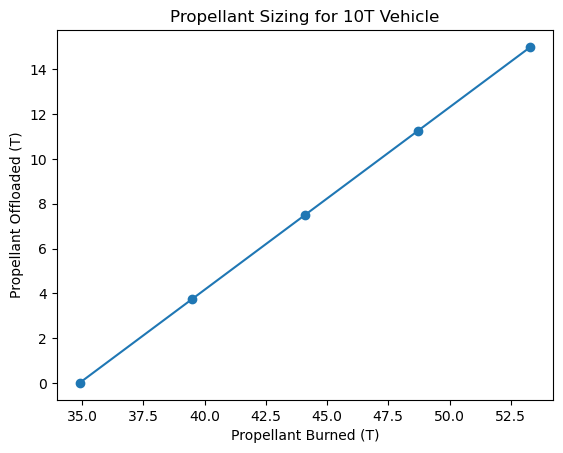

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.plot( m_burned/1000, m_dump/1000, marker='o', linestyle='-' )

# Adding labels and title
title = 'Propellant Sizing for 10T Vehicle'
plt.xlabel('Propellant Burned (T)')
plt.ylabel('Propellant Offloaded (T)')
plt.title(title)

# Display the plot
plt.savefig(title.replace(' ','_') + '.png')
plt.show()


